# Dylan's Bike Ride, Take 1

## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import sonify

%matplotlib inline

## Filter functions to extract speed and heart rate

In [2]:
def filter_speed(image):
    return image[:, :, 0] < 100

def filter_heart_rate(image):
    return image[:, :, 2] < 100

## Function to generate track

In [3]:
def generate_track(metric_array, x_min=0, x_max=100, y_min=50, y_max=80):
    """
    :param metric_array: 2d boolean numpy array containing metric curve
    :param x_min: integer indicating minimum desired x value
    :param x_max: integer indicating maximum desired x value
    :param y_min: integer indicating minimum desired y value (0 <= y_min <= 127)
    :param y_max: integer indicating maximum desired y value (0 <= y_max <= 127)
    :return: list of tuples appropriate for a sonify track
    """
    y, x = np.where(metric_array == True)
    y = -y  # image origin at upper left corener, need to flip y axis
    scaled_x = sonify.scale_list_to_range(x, x_min, x_max)
    scaled_y = sonify.scale_list_to_range(y, y_min, y_max)
    unsorted_track = list(zip(scaled_x, scaled_y))
    return sorted(unsorted_track, key=lambda tup: tup[0])

## Load plot of first bike ride and filter metrics

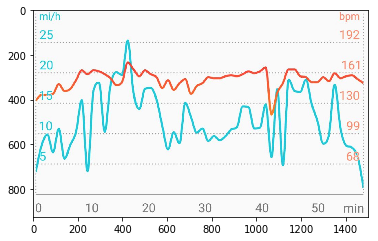

In [4]:
image1 = np.array(Image.open('dylan_bike_rides/ride01.jpg'))
plt.imshow(image1)
plt.show()
speed = filter_speed(image1[:, 150:1350, :])
heart_rate = filter_heart_rate(image1[:, 150:1350, :])

## Generate track 1 from speed and track 2 from heart rate

In [5]:
speed_track = generate_track(speed)
heart_rate_track = generate_track(heart_rate)

## Putting it all together

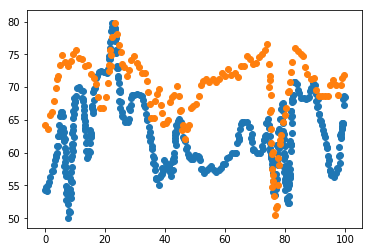

Done playing!


In [6]:
multitrack = []
multitrack.append(speed_track[::100])
multitrack.append(heart_rate_track[::100])
plt.scatter(*zip(*speed_track[::100]))
plt.scatter(*zip(*heart_rate_track[::100]))
plt.show()
sonify.play_midi_from_data(multitrack, track_type='multiple', key='c_major')